##### This script prepares the MNIST dataset for use in Baler, by changing the format of a mnist.npz file which can be downloaded from Kaggle here: https://www.kaggle.com/datasets/mustafaali96/mnistnpz.
###### Once you download this you can run the rest of the code. 
###### The new file is saved as 'MNIST_4_baler.npz'

Alternatively, if you have Keras installed, you can use their dataset (from keras.datasets import mnist) which is also split into x_test, x_train, y_test, and y_train. See section titled "Using Keras" below

In [21]:
import numpy as np
import pandas as pd

In [6]:
orig_npz = np.load('mnist.npz')
df = pd.DataFrame(orig_npz)


column_names = df.columns
print(df.head())
# To print the shape (number of rows and columns) of the DataFrame:
print("DataFrame shape:", df.shape)
# To print the total number of elements in the DataFrame:
print("DataFrame size:", df.size)

         0
0   x_test
1  x_train
2  y_train
3   y_test
DataFrame shape: (4, 1)
DataFrame size: 4


In [7]:
#loading all of the data from the npz file
x_test = orig_npz['x_test']
x_train = orig_npz['x_train']
y_train = orig_npz['y_train']
y_test = orig_npz['y_test']

In [16]:
#we want the baler format for data, so we need to concatenate the train and test values
x = np.concatenate((x_train, x_test), axis=0)
print('x shape: ', x.shape)

y = np.concatenate((y_train, y_test), axis=0)
print('y (labels) shape: ', y.shape)

x shape:  (70000, 28, 28)
y (labels) shape:  (70000,)


In [19]:
#save the new file, you can change the path to save directly to Baler/workspaces/CFD_workspace/data
np.savez('MNIST_4_baler.npz', data=x, names=y)

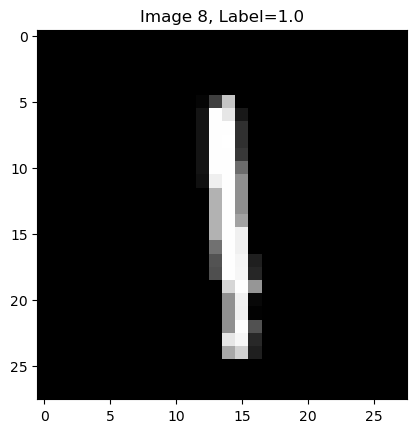

In [20]:
#check that it looks right, and labels are assigned correctly
# Load  data from the NPZ file
loaded_data = np.load('MNIST_4_baler.npz')

loaded_x = loaded_data['data']
loaded_y = loaded_data['names']

import matplotlib.pyplot as plt

index_to_plot = 8

plt.imshow(loaded_x[index_to_plot], cmap='gray')
plt.title(f"Image {index_to_plot}, Label={loaded_y[index_to_plot]}")
#plt.savefig('MNIST_npz_test.png')
plt.show()

## Using Keras
###### Exact same procedure except dataset is imported using keras.datasets (https://keras.io/api/datasets/mnist/#load_data-function)

In [15]:
import numpy as np
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255. #div by 255 means we normalize to a value between 0 and 1
x_test = x_test.astype('float32') / 255.
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#we want the baler format for data, so we need to concatenate the train and test values
x = np.concatenate((x_train, x_test), axis=0)
print('x shape: ', x.shape)

y = np.concatenate((y_train, y_test), axis=0)
print('y (labels) shape: ', y.shape)

In [ ]:
#save the new file, you can change the path to save directly to Baler/workspaces/CFD_workspace/data
np.savez('MNIST_4_baler.npz', data=x, names=y)

In [ ]:
#check that it looks right, and labels are assigned correctly
# Load  data from the NPZ file
loaded_data = np.load('MNIST_4_baler.npz')

loaded_x = loaded_data['data']
loaded_y = loaded_data['names']

import matplotlib.pyplot as plt

index_to_plot = 8

plt.imshow(loaded_x[index_to_plot], cmap='gray')
plt.title(f"Image {index_to_plot}, Label={loaded_y[index_to_plot]}")
#plt.savefig('MNIST_npz_test.png')
plt.show()